# Assignement 7


Part I: Randomized Sales Data GeneraƟon (NumPy)
1. IniƟalize Random Seed
2. Generate Sales Data
 Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category:
 Electronics, Clothing, Home & Kitchen, Sports.
 Sales values should be between 1000 and 5000 units per month.
 The range should be randomized using the seed.
3. Convert to DataFrame
 Convert the cleaned NumPy array into a Pandas DataFrame with:
i. Columns: Electronics, Clothing, Home & Kitchen, Sports
ii. Index: Months from Jan to Dec

In [1]:
import numpy as np
import pandas as pd

ROLL_NUMBER = 123456
np.random.seed(ROLL_NUMBER)


sales_min = np.random.randint(1000, 3000)
sales_max = np.random.randint(3001, 5001)


sales_data = np.random.randint(sales_min, sales_max, size=(12, 4))


columns = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sales_df = pd.DataFrame(sales_data, columns=columns, index=months)

print("Sales DataFrame:")
print(sales_df)


Sales DataFrame:
     Electronics  Clothing  Home & Kitchen  Sports
Jan         1563      1236            1620    1097
Feb         1280      1741            3249    3571
Mar         2355      3645            2068    1368
Apr         1535      2635            1975    1775
May         3307      2264            1671    2973
Jun         2518      2084            2030    2074
Jul         3072      2548            1484    2054
Aug         2768      1509            1931    3256
Sep         1816      2436            2685    1571
Oct         1203      2437            3069    2039
Nov         1549      1918            2909    3280
Dec         3720      1837            3306    1210


Part II: Data ManipulaƟon and Analysis (Pandas)
1. Display the first 5 rows and summary staƟsƟcs of the DataFrame.
2. Calculate the total sales per category and total sales per month.
3. Calculate the average sales growth between consecuƟve months for each category.
4. Add the following columns to the DataFrame:
 Total Sales: Sum of all categories per month.
 Growth Rate: Percentage change in Total Sales from the previous month.
5. Apply a randomized discount:
 If your roll number is even, apply a 10% discount to the Electronics category.

 If odd, apply a 15% discount to the Clothing category.

In [ ]:

print("First 5 Rows:")
print(sales_df.head())

print("\nSummary Statistics:")
print(sales_df.describe())

total_sales_per_category = sales_df.sum()
print("\nTotal Sales per Category:")
print(total_sales_per_category)

total_sales_per_month = sales_df.sum(axis=1)
print("\nTotal Sales per Month:")
print(total_sales_per_month)

sales_growth = sales_df.pct_change().mean() * 100  
print("\nAverage Monthly Growth Rate (%) for Each Category:")
print(sales_growth)

sales_df['Total Sales'] = sales_df.sum(axis=1)
sales_df['Growth Rate (%)'] = sales_df['Total Sales'].pct_change() * 100

if ROLL_NUMBER % 2 == 0:
    print("\nRoll number is even: Applying 10% discount to Electronics category.")
    sales_df['Electronics'] = sales_df['Electronics'] * 0.9  # 10% discount
else:
    print("\nRoll number is odd: Applying 15% discount to Clothing category.")
    sales_df['Clothing'] = sales_df['Clothing'] * 0.85  # 15% discount

sales_df = sales_df.round(2)

print("\nFinal DataFrame with Total Sales, Growth Rate, and Discounts:")
print(sales_df)


First 5 Rows:
     Electronics  Clothing  Home & Kitchen  Sports
Jan         1563      1236            1620    1097
Feb         1280      1741            3249    3571
Mar         2355      3645            2068    1368
Apr         1535      2635            1975    1775
May         3307      2264            1671    2973

Summary Statistics:
       Electronics     Clothing  Home & Kitchen       Sports
count    12.000000    12.000000       12.000000    12.000000
mean   2223.833333  2190.833333     2333.083333  2189.000000
std     852.634936   629.250179      667.585671   867.890127
min    1203.000000  1236.000000     1484.000000  1097.000000
25%    1545.500000  1813.000000     1866.000000  1520.250000
50%    2085.500000  2174.000000     2049.000000  2046.500000
75%    2844.000000  2464.750000     2949.000000  3043.750000
max    3720.000000  3645.000000     3306.000000  3571.000000

Total Sales per Category:
Electronics       26686
Clothing          26290
Home & Kitchen    27997
Sports     

Part III: VisualizaƟons (Matplotlib and Seaborn)
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
 Box plots to show the sales distribuƟon for each category.

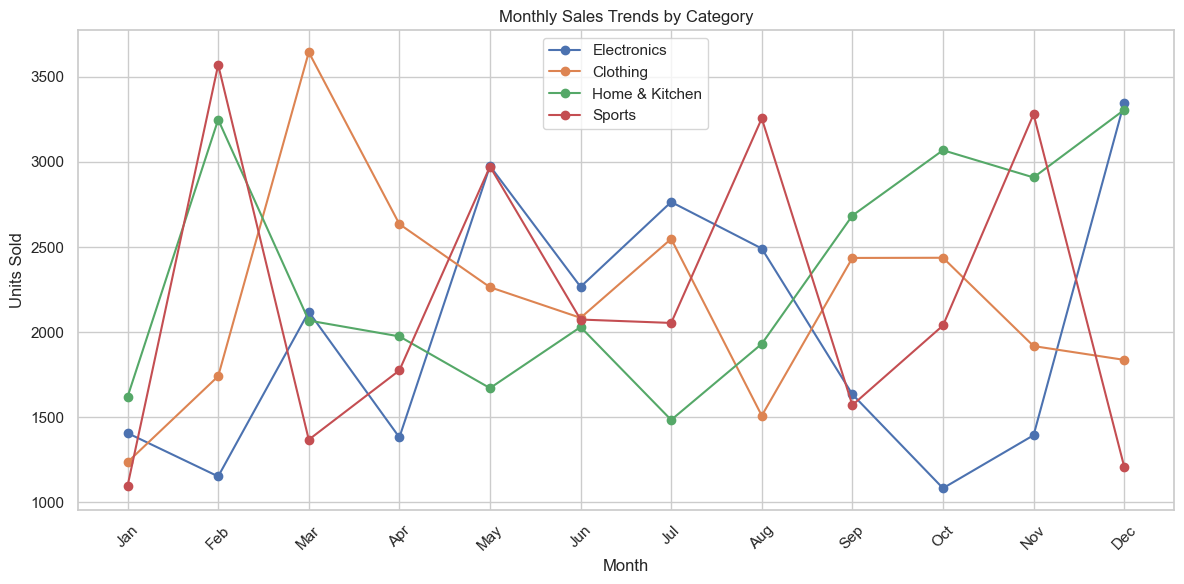

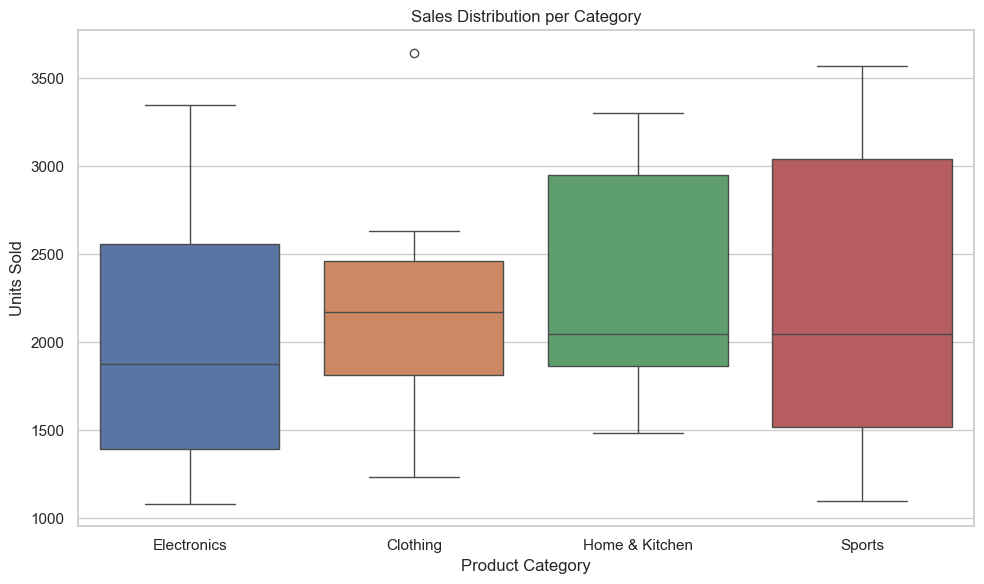

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
for category in ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']:
    plt.plot(sales_df.index, sales_df[category], marker='o', label=category)

plt.title('Monthly Sales Trends by Category')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_df[['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']])
plt.title('Sales Distribution per Category')
plt.ylabel('Units Sold')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()


Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
i. Find element-wise absolute value
ii. Find the 25th, 50th, and 75th percenƟle of flaƩened array, for each column, for each
row.
iii. Mean, Median and Standard DeviaƟon of flaƩened array, of each column, and
each row

In [ ]:
import numpy as np

array = np.array([[1, -2, 3], [-4, 5, -6]])

abs_array = np.abs(array)
print("i. Element-wise Absolute Value:\n", abs_array)

flat_array = array.flatten()
percentiles_flat = np.percentile(flat_array, [25, 50, 75])
percentiles_col = np.percentile(array, [25, 50, 75], axis=0)
percentiles_row = np.percentile(array, [25, 50, 75], axis=1)

print("\nii. Percentiles:")
print("Flattened (25th, 50th, 75th):", percentiles_flat)
print("Per Column (25th, 50th, 75th):\n", percentiles_col)
print("Per Row (25th, 50th, 75th):\n", percentiles_row)

mean_flat = np.mean(flat_array)
median_flat = np.median(flat_array)
std_flat = np.std(flat_array)

mean_col = np.mean(array, axis=0)
median_col = np.median(array, axis=0)
std_col = np.std(array, axis=0)

mean_row = np.mean(array, axis=1)
median_row = np.median(array, axis=1)
std_row = np.std(array, axis=1)

print("\niii. Statistics:")
print("Flattened -> Mean:", mean_flat, "| Median:", median_flat, "| Std Dev:", std_flat)
print("Per Column -> Mean:", mean_col)
print("             Median:", median_col)
print("             Std Dev:", std_col)
print("Per Row    -> Mean:", mean_row)
print("             Median:", median_row)
print("             Std Dev:", std_row)


i. Element-wise Absolute Value:
 [[1 2 3]
 [4 5 6]]

ii. Percentiles:
Flattened (25th, 50th, 75th): [-3.5 -0.5  2.5]
Per Column (25th, 50th, 75th):
 [[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]
Per Row (25th, 50th, 75th):
 [[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]

iii. Statistics:
Flattened -> Mean: -0.5 | Median: -0.5 | Std Dev: 3.8622100754188224
Per Column -> Mean: [-1.5  1.5 -1.5]
             Median: [-1.5  1.5 -1.5]
             Std Dev: [2.5 3.5 4.5]
Per Row    -> Mean: [ 0.66666667 -1.66666667]
             Median: [ 1. -4.]
             Std Dev: [2.05480467 4.78423336]


Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).
i. Find floor, ceiling and truncated value, rounded values

In [ ]:
import numpy as np

# Given array
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

floor_vals = np.floor(a)
ceil_vals = np.ceil(a)
trunc_vals = np.trunc(a)
round_vals = np.round(a)

print("Original Array:\n", a)
print("\nFloor Values:\n", floor_vals)
print("\nCeiling Values:\n", ceil_vals)
print("\nTruncated Values:\n", trunc_vals)
print("\nRounded Values:\n", round_vals)


Original Array:
 [-1.8 -1.6 -0.5  0.5  1.6  1.8  3. ]

Floor Values:
 [-2. -2. -1.  0.  1.  1.  3.]

Ceiling Values:
 [-1. -1. -0.  1.  2.  2.  3.]

Truncated Values:
 [-1. -1. -0.  0.  1.  1.  3.]

Rounded Values:
 [-2. -2. -0.  0.  2.  2.  3.]


Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.

In [ ]:
my_list = [10, 20, 30, 40, 50]

i = 1
j = 3

print("Original List:", my_list)

temp = my_list[i]
my_list[i] = my_list[j]
my_list[j] = temp

print(f"List after swapping elements at index {i} and {j}:", my_list)


Original List: [10, 20, 30, 40, 50]
List after swapping elements at index 1 and 3: [10, 40, 30, 20, 50]


Q.5 Write a Python program to swap two elements in a set by converƟng it to a list first.

In [ ]:
my_set = {10, 20, 30, 40, 50}

set_as_list = list(my_set)

i = 1
j = 3

print("Original Set:", my_set)
print("Converted to List:", set_as_list)

temp = set_as_list[i]
set_as_list[i] = set_as_list[j]
set_as_list[j] = temp

swapped_set = set(set_as_list)

print("Set after swapping elements:", swapped_set)


Original Set: {50, 20, 40, 10, 30}
Converted to List: [50, 20, 40, 10, 30]
Set after swapping elements: {40, 10, 50, 20, 30}
